# 모델 탐구
- 분석 대상 데이터셋(tg_df)에 대한 다양한 모델 적용

In [124]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [125]:
warnings.filterwarnings("ignore")
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

In [126]:
tg_df = pd.read_csv("target.csv", encoding="utf-8-sig")

display(tg_df)

,app_id,name,price,developer,publisher,co-op,r_rated,is_social,geom_avg,corona_special
0,379720,DOOM,19.99,id Software,Bethesda Softworks,True,False,False,0.990555,True
1,637090,BATTLETECH,39.99,Harebrained Schemes,Paradox Interactive,False,False,False,1.146594,False
2,221100,DayZ,44.99,Bohemia Interactive,Bohemia Interactive,False,False,True,1.053440,True
3,8500,EVE Online,0.00,CCP,CCP,True,False,True,1.002647,True
4,477160,Human: Fall Flat,14.99,No Brakes Games,Curve Digital,True,False,True,0.989966,True
...,...,...,...,...,...,...,...,...,...,...
3200,233680,Black Ink,0.00,Bleank,Bleank,False,False,False,0.984097,True
3201,748890,Choice of Rebels: Uprising,501.87,Choice of Games,Choice of Games,False,False,False,0.973015,False
3202,471810,Death Squared,14.99,SMG Studio,SMG Studio,True,False,False,1.031506,True
3203,404590,Vikings - Wolves of Midgard,29.99,Games Farm,Kalypso Media Digital,True,False,False,0.987455,False


In [127]:
# app_id를 인덱스로 대체
tg_df = tg_df.set_index("app_id")
tg_df.index.name = None

display(tg_df)

,name,price,developer,publisher,co-op,r_rated,is_social,geom_avg,corona_special
379720,DOOM,19.99,id Software,Bethesda Softworks,True,False,False,0.990555,True
637090,BATTLETECH,39.99,Harebrained Schemes,Paradox Interactive,False,False,False,1.146594,False
221100,DayZ,44.99,Bohemia Interactive,Bohemia Interactive,False,False,True,1.053440,True
8500,EVE Online,0.00,CCP,CCP,True,False,True,1.002647,True
477160,Human: Fall Flat,14.99,No Brakes Games,Curve Digital,True,False,True,0.989966,True
...,...,...,...,...,...,...,...,...,...
233680,Black Ink,0.00,Bleank,Bleank,False,False,False,0.984097,True
748890,Choice of Rebels: Uprising,501.87,Choice of Games,Choice of Games,False,False,False,0.973015,False
471810,Death Squared,14.99,SMG Studio,SMG Studio,True,False,False,1.031506,True
404590,Vikings - Wolves of Midgard,29.99,Games Farm,Kalypso Media Digital,True,False,False,0.987455,False


In [128]:
# 불필요한 열 제거
# 분석 기간에 해당하는 데이터만을 가지고 geom_avg을 쓰면 코로나 특수와 겹치는 느낌이 있으므로
# 분석 성능이 좋게 나오는데에 지나치게 유리하게 적용...
# 분석 기간을 한정하지 않고 전체 데이터를 다룬 뒤에 게임 출시후 지난 시간을 속성으로 넣는건?
# (코로나 이후 출시 게임은 제외)
tg_df = tg_df.drop(["name", "developer", "publisher"], axis=1)

display(tg_df)

,price,co-op,r_rated,is_social,geom_avg,corona_special
379720,19.99,True,False,False,0.990555,True
637090,39.99,False,False,False,1.146594,False
221100,44.99,False,False,True,1.053440,True
8500,0.00,True,False,True,1.002647,True
477160,14.99,True,False,True,0.989966,True
...,...,...,...,...,...,...
233680,0.00,False,False,False,0.984097,True
748890,501.87,False,False,False,0.973015,False
471810,14.99,True,False,False,1.031506,True
404590,29.99,True,False,False,0.987455,False


In [129]:
# bool값을 1 / 0으로 대체 (정규화..?)
# 방법 1
tg_df = tg_df * 1

# 방법 2
# bool 값을 갖는 열의 astype을 모두 int로 변경

display(tg_df)

,price,co-op,r_rated,is_social,geom_avg,corona_special
379720,19.99,1,0,0,0.990555,1
637090,39.99,0,0,0,1.146594,0
221100,44.99,0,0,1,1.053440,1
8500,0.00,1,0,1,1.002647,1
477160,14.99,1,0,1,0.989966,1
...,...,...,...,...,...,...
233680,0.00,0,0,0,0.984097,1
748890,501.87,0,0,0,0.973015,0
471810,14.99,1,0,0,1.031506,1
404590,29.99,1,0,0,0.987455,0


---
# 로지스틱

In [130]:
# 독립 변수와 종속변수(코로나 특수) 분리
# 소셜 게임 여부로 적용 시 성능이 매우 안좋게 나옴
# 코로나 이후에 이용자 수가 증가한 게임의 특징(속성)은 무엇이 있을까? 로 접근
X = tg_df.drop(["corona_special"], axis=1)
Y = tg_df[["corona_special"]]

display(X)
display(Y)

,price,co-op,r_rated,is_social,geom_avg
379720,19.99,1,0,0,0.990555
637090,39.99,0,0,0,1.146594
221100,44.99,0,0,1,1.053440
8500,0.00,1,0,1,1.002647
477160,14.99,1,0,1,0.989966
...,...,...,...,...,...
233680,0.00,0,0,0,0.984097
748890,501.87,0,0,0,0.973015
471810,14.99,1,0,0,1.031506
404590,29.99,1,0,0,0.987455


,corona_special
379720,1
637090,0
221100,1
8500,1
477160,1
...,...
233680,1
748890,0
471810,1
404590,0


In [131]:
# intercept 추가
X = sm.add_constant(X, has_constant="add")

display(X.head())

,const,price,co-op,r_rated,is_social,geom_avg
379720,1.0,19.99,1,0,0,0.990555
637090,1.0,39.99,0,0,0,1.146594
221100,1.0,44.99,0,0,1,1.053440
8500,1.0,0.00,1,0,1,1.002647
477160,1.0,14.99,1,0,1,0.989966


In [132]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2243, 6) (962, 6) (2243, 1) (962, 1)


In [133]:
# 로지스틱 회귀 모델 생성
logit_m = sm.Logit(Y_train, X_train)
logit_m_train = logit_m.fit(method="powell") # powell, cg, bfgs, lbfgs

display(logit_m_train.summary())

Optimization terminated successfully.
         Current function value: 0.555249
         Iterations: 9
         Function evaluations: 604


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         corona_special   No. Observations:                 2243
Model:                          Logit   Df Residuals:                     2237
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Nov 2021   Pseudo R-squ.:                  0.1848
Time:                        01:56:31   Log-Likelihood:                -1245.4
converged:                       True   LL-Null:                       -1527.8
Covariance Type:            nonrobust   LLR p-value:                8.497e-120
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.3672      2.913    -17.636      0.000     -57.076     -45.659
price         -0.0053      0.002     -2.762      0.006      -0.009      -0.002
co-op         -0.0804      0.125     -0.645      0.519      -0.325       0.164
r_rated       -0.3225      0.208     -1.551      0.121      -0.730       0.085
is_social     -0.3885      0.101     -3.859      0.000      -0.586      -0.191
geom_avg      52.3916      2.941     17.812      0.000      46.627      58.157
==============================================================================
"""

In [134]:
display(np.exp(logit_m_train.params))

const        4.914630e-23
price        9.947471e-01
co-op        9.227915e-01
r_rated      7.243102e-01
is_social    6.780557e-01
geom_avg     5.667624e+22
dtype: float64

In [135]:
Y_predict = logit_m_train.predict(X_test)
print(Y_predict)

339790    0.589862
732430    0.303971
209120    0.643770
558790    0.832377
281610    0.655182
            ...   
594570    0.759582
435440    0.455719
576770    0.865132
242640    0.566816
379430    0.098503
Length: 962, dtype: float64


Train Accuracy: 0.7944716897012929 
Train AUC: 0.7868176042226674 
Train Confusion Matrix:
[[ 699  249]
 [ 212 1083]]
Test Accuracy: 0.7796257796257796 
Test AUC: 0.7708119218910586 
Test Confusion Matrix:
[[290 116]
 [ 96 460]]


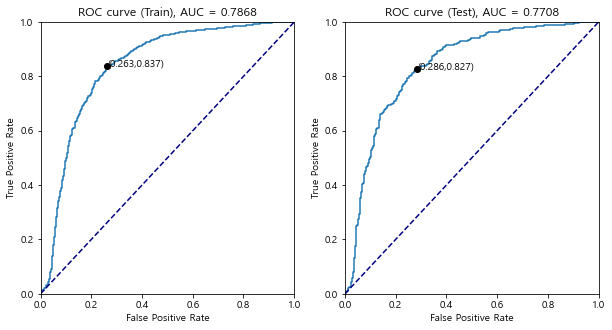

Best Threshold: 0.5305205551928434


In [136]:
def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    """
    a funciton to plot the ROC curve for train labels and test labels.
    Use the best threshold found in train set to classify items in test set.
    """
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print("Train Accuracy: %s " %acc_train)
    print("Train AUC: %s " %auc_train)
    print("Train Confusion Matrix:")
    print(cm_train)

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color="navy", linestyle="--")
    dot = ax.plot(best_fpr_train, best_tpr_train, marker="o", color="black")
    ax.text(best_fpr_train, best_tpr_train, s = "(%.3f,%.3f)" %(best_fpr_train, best_tpr_train))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve (Train), AUC = %.4f"%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print("Test Accuracy: %s " %acc_test)
    print("Test AUC: %s " %auc_test)
    print("Test Confusion Matrix:")
    print(cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color="navy", linestyle="--")
    dot = ax2.plot(fpr_score, tpr_score, marker="o", color="black")
    ax2.text(fpr_score, tpr_score, s = "(%.3f,%.3f)" %(fpr_score, tpr_score))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve (Test), AUC = %.4f"%auc_test)
    plt.savefig("ROC", dpi = 500)
    plt.show()

    return best_threshold

best_threshold = plot_ROC(y_train_true=Y_train, y_train_prob=logit_m_train.predict(X_train), 
                          y_test_true=Y_test, y_test_prob=logit_m_train.predict(X_test))
print("Best Threshold:", best_threshold)

In [139]:
# result: logistic regression
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

---
# 결정 트리

In [140]:
# 독립 변수와 종속변수(코로나 특수) 분리
# 소셜 게임 여부로 적용 시 성능이 매우 안좋게 나옴
# 코로나 이후에 이용자 수가 증가한 게임의 특징(속성)은 무엇이 있을까? 로 접근
X = tg_df.drop(["corona_special"], axis=1)
Y = tg_df[["corona_special"]]

In [141]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2243, 5) (962, 5) (2243, 1) (962, 1)


In [142]:
dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(X_train, Y_train)
# 정확도 출력, 표본수가 적어서 차이가 큰가?
print(dt.score(X_train, Y_train))
print(dt.score(X_test, Y_test))

1.0
0.6964656964656964


In [144]:
# plt.figure(figsize = (30, 10))
# plot_tree(dt, filled = True, feature_names = ["price", "co-op", "r_rated", "is_social", "geom_avg"])
# plt.show()

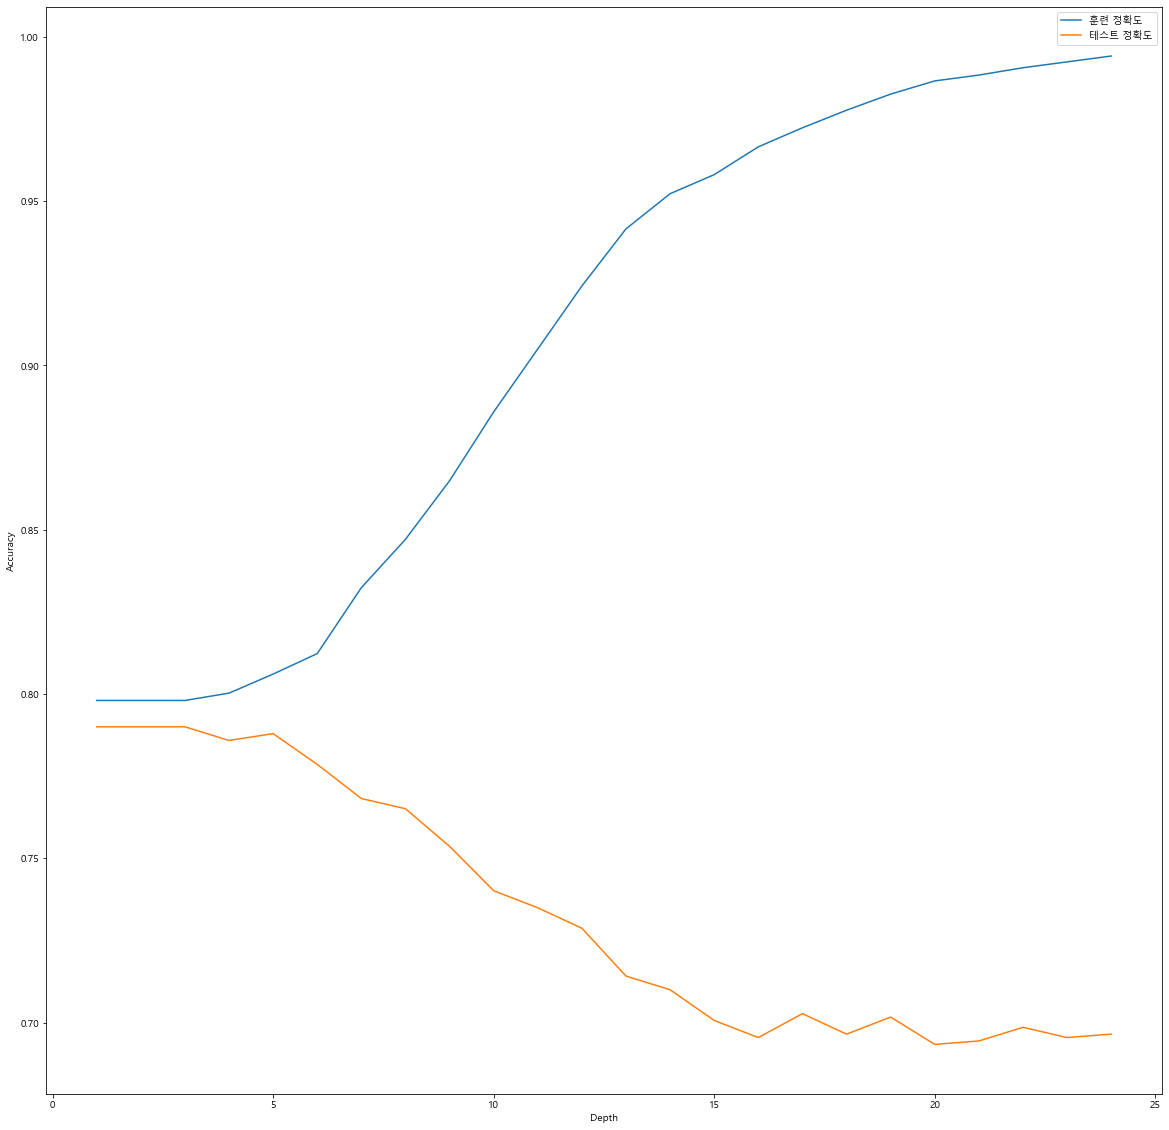

In [145]:
# 가지치기
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 1234)
    dt.fit(X_train, Y_train)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train, Y_train))
    test_accuracy.append(dt.score(X_test, Y_test))

# 깊이 증가에 따른 예측정확도 성능 비교
plt.figure(figsize=(20,20))
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

In [146]:
# 표본수가 적어서 이모양인가??

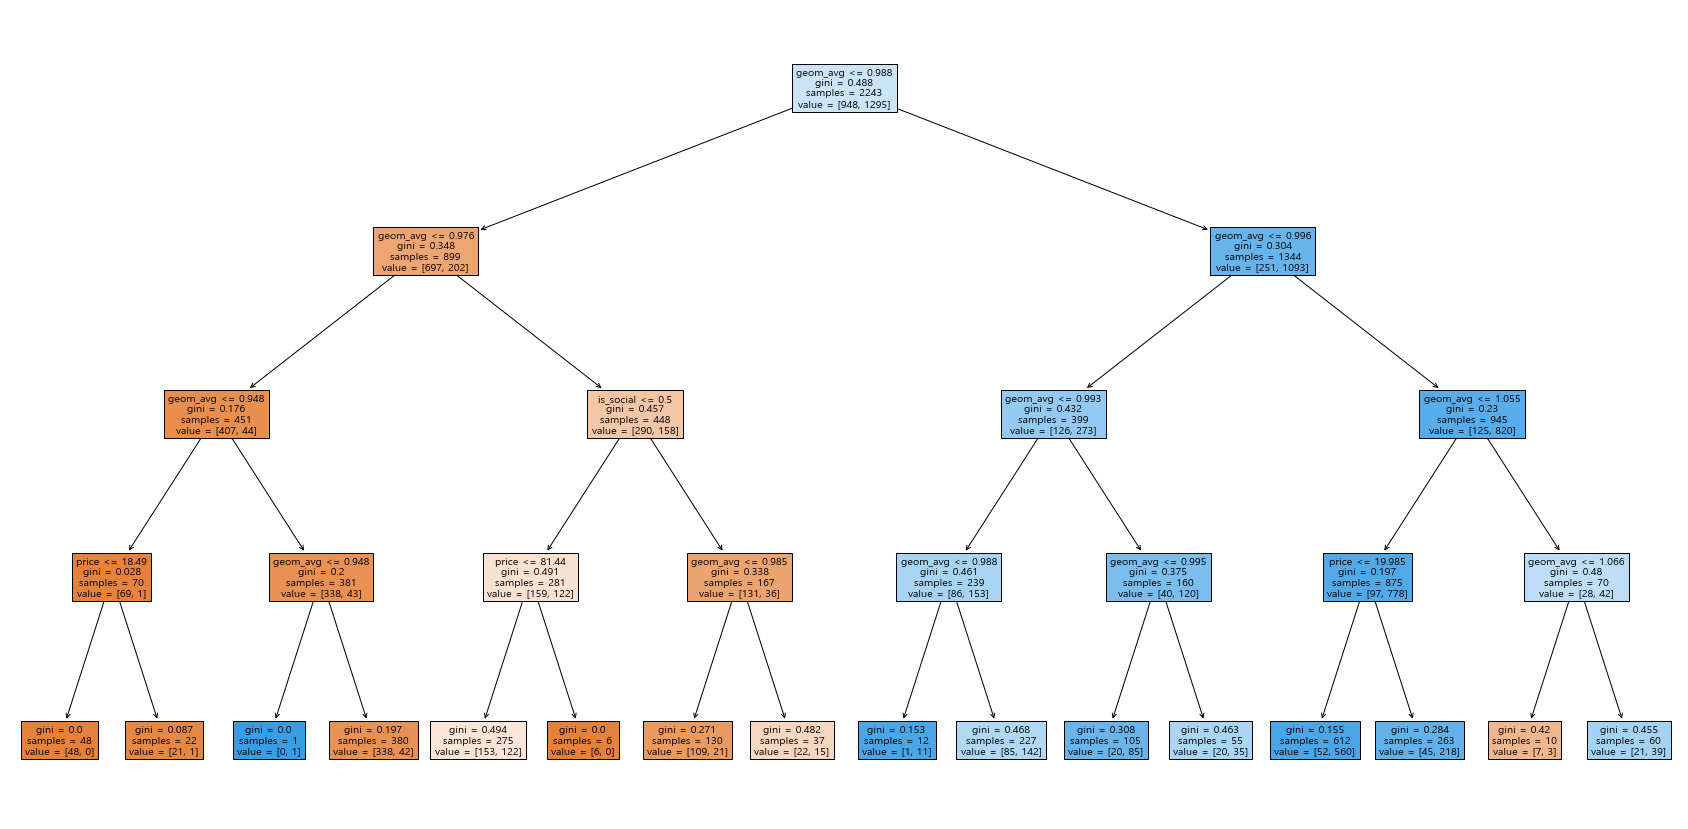

In [147]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
dt.fit(X_train, Y_train)
plt.figure(figsize = (30, 15))
plot_tree(dt, filled = True, feature_names = ["price", "co-op", "r_rated", "is_social", "geom_avg"])
plt.show()

In [149]:
# result: decision tree
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# 오류가 나오는 이유
# geom_avg 때문에 결과가 지나치게 편향됨